# Quant - Transformation

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


C:\Users\Chinmay\Python\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
ticker = 'JPM'
start = '2015-01-01'
end = '2020-01-01'

data = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data['Ret'] = (data.Close - data.Close.shift(-1)) / data.Close.shift(-1)

In [4]:
data['logRet'] = np.log( data.Close / data.Close.shift(-1))

In [5]:
df = data[['Close', 'Ret','logRet']]
df.head()

,Close,Ret,logRet
Date,,,
2015-01-02,62.490002,0.032040,0.031537
2015-01-05,60.549999,0.026619,0.026271
2015-01-06,58.980000,-0.001524,-0.001525
2015-01-07,59.070000,-0.021858,-0.022100
2015-01-08,60.389999,0.017695,0.017540


In [6]:
## Applying boxcox transformation
from scipy import stats

sw1 = stats.shapiro(df['Ret'])
print(sw1)

ShapiroResult(statistic=nan, pvalue=1.0)


C:\Users\Chinmay\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


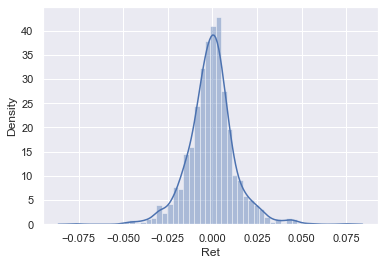

In [7]:
import seaborn as sns
sns.set(style='darkgrid')

sns.distplot(df['Ret'])
plt.show()

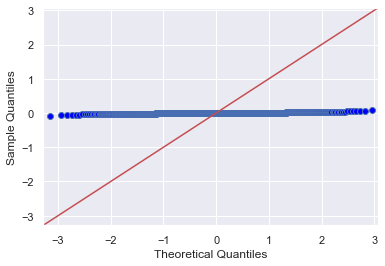

In [8]:
## QQ plot

import statsmodels.api as sm

qq1 = sm.qqplot(df['Ret'], line='45')
plt.show()

In [10]:
sw2 = stats.shapiro(df['logRet'])
print(sw2)

ShapiroResult(statistic=nan, pvalue=1.0)
